In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.Tensor(num_data, 1), std=1)
x = init.uniform_(torch.Tensor(num_data, 1), -15, 15)
y = x**2 + 3
y_noise = y + noise

model = nn.Sequential(
    nn.Linear(1, 6),
    nn.ReLU(),
    nn.Linear(6, 10),
    nn.ReLU(),
    nn.Linear(10, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.0002)

loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y_noise)
    loss.backward()
    optimizer.step()
    if i % 1000 == 0:
        print(loss)
    
    loss_array.append(loss.item())

tensor(80.3713, grad_fn=<L1LossBackward>)
tensor(79.8147, grad_fn=<L1LossBackward>)
tensor(77.9617, grad_fn=<L1LossBackward>)
tensor(21.2746, grad_fn=<L1LossBackward>)
tensor(19.7440, grad_fn=<L1LossBackward>)
tensor(18.6054, grad_fn=<L1LossBackward>)
tensor(17.2918, grad_fn=<L1LossBackward>)
tensor(15.6244, grad_fn=<L1LossBackward>)
tensor(13.6179, grad_fn=<L1LossBackward>)
tensor(10.9239, grad_fn=<L1LossBackward>)


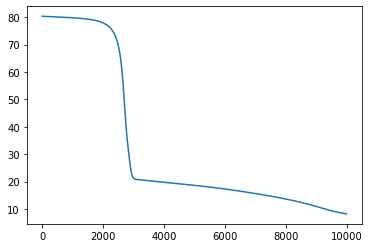

In [2]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()